<a href="https://colab.research.google.com/github/Noman-Sajal/Employment-Rate-Prediction-by-Neural-Network/blob/main/Code_Work_upadated_80_1_1.(16/12/24%20update).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded JSON file
with open('countries_data.json', 'r') as file:
    countries_data = json.load(file)

# Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
print(country_info_df.head())


    Country Name  Continent     Area   Latitude  Longitude
0  South Georgia  Antarctic   3903.0 -54.500000 -37.000000
1        Grenada   Americas    344.0  12.116667 -61.666667
2    Switzerland     Europe  41284.0  47.000000   8.000000
3   Sierra Leone     Africa  71740.0   8.500000 -11.500000
4        Hungary     Europe  93028.0  47.000000  20.000000


In [ ]:
# Load the World Bank datasets
gdp_df = pd.read_csv('gdp_data.csv')
labor_force_df = pd.read_csv('labor_force_data.csv')
inflation_df = pd.read_csv('inflation_data.csv')
population_growth_df = pd.read_csv('population_growth_data.csv')
gdp_growth_df = pd.read_csv('gdp_growth_data.csv')
trade_df = pd.read_csv('trade_data.csv')
employment_df = pd.read_csv('employment_data.csv')


In [ ]:
# Create a set of unique country names from both datasets to check mismatches
world_bank_countries = set(gdp_df['Country Name'].unique())
api_countries = set(country_info_df['Country Name'].unique())

# Find mismatches: Countries in the World Bank dataset not in the API dataset
mismatched_countries = world_bank_countries - api_countries

# Display mismatched countries
print(f"Number of mismatched countries: {len(mismatched_countries)}")
print("Mismatched countries:", mismatched_countries)


# Dictionary to map country names from API to World Bank dataset format
country_name_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Republic of the Congo': 'Congo, Rep.',
    'DR Congo':'Congo, Dem. Rep.',
    'Ivory Coast':"Cote d'Ivoire",
    'Curaçao': 'Curacao',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Yemen': 'Yemen, Rep.',
    'Laos': 'Lao PDR',
    'Macau': 'Macao SAR, China',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Slovakia': 'Slovak Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Martin': 'St. Martin (French part)',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'British Virgin Islands': 'Virgin Islands (U.S.)',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam'
}


Number of mismatched countries: 34
Mismatched countries: {'Korea, Rep.', 'Iran, Islamic Rep.', 'St. Lucia', 'St. Kitts and Nevis', nan, 'St. Vincent and the Grenadines', 'Channel Islands', 'Virgin Islands (U.S.)', 'Viet Nam', 'Syrian Arab Republic', 'Kyrgyz Republic', 'Turkiye', 'Micronesia, Fed. Sts.', 'Sint Maarten (Dutch part)', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', "Korea, Dem. People's Rep.", 'Sao Tome and Principe', 'Gambia, The', 'Slovak Republic', 'Macao SAR, China', 'West Bank and Gaza', 'Russian Federation', 'Congo, Rep.', 'Cabo Verde', 'Lao PDR', 'Yemen, Rep.', 'Hong Kong SAR, China', 'Curacao', "Cote d'Ivoire", 'Venezuela, RB', 'Bahamas, The', 'St. Martin (French part)', 'Brunei Darussalam'}


In [ ]:
# Define a function to merge datasets and reorder columns
def merge_and_reorder(df, country_info_df):
    merged_df = pd.merge(df, country_info_df, on='Country Name', how='left')

    # Reorder columns to place 'Continent', 'Area', 'Latitude', and 'Longitude' in the desired positions
    columns = merged_df.columns.tolist()
    columns_to_move = ['Continent', 'Area', 'Latitude', 'Longitude']

    # Remove the columns from their current positions
    for col in columns_to_move:
        columns.remove(col)

    # Insert the columns in the desired positions (after 'Country Name' and 'Country Code')
    for i, col in enumerate(columns_to_move):
        columns.insert(3 + i, col)  # Insert starting at index 3 for 4th position

    # Reorder the DataFrame using the new column order
    return merged_df[columns]

# Function to clean unwanted footer text (Meta Data) from DataFrames
def clean_footer(df):
    # Replace footer text with NaN
    footer_texts = ["Data from database: World Development Indicators", "Last Updated: 09/19/2024"]
    for footer in footer_texts:
        df.replace(footer, pd.NA, inplace=True)
    return df.dropna(how='all')
# Merge each dataset with country_info_df and clean footer texts
gdp_merged = clean_footer(merge_and_reorder(gdp_df, country_info_df))
labor_force_merged = clean_footer(merge_and_reorder(labor_force_df, country_info_df))
inflation_merged = clean_footer(merge_and_reorder(inflation_df, country_info_df))
population_growth_merged = clean_footer(merge_and_reorder(population_growth_df, country_info_df))
gdp_growth_merged = clean_footer(merge_and_reorder(gdp_growth_df, country_info_df))
trade_merged = clean_footer(merge_and_reorder(trade_df, country_info_df))
employment_merged = clean_footer(merge_and_reorder(employment_df, country_info_df))

# Step 11: Concatenate all merged datasets into a single DataFrame
combined_df = pd.concat([
    gdp_merged,
    labor_force_merged,
    inflation_merged,
    population_growth_merged,
    gdp_growth_merged,
    trade_merged,
    employment_merged
], ignore_index=True)

# Display the first few rows and check the shape of the combined dataset
print("Shape of the combined DataFrame:", combined_df.shape)
combined_df.head()


Shape of the combined DataFrame: (1519, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [ ]:
# Handle missing values by counting NaNs, zeros, and placeholder values
nan_count = combined_df.isna().sum().sum()
zero_count = (combined_df == 0).sum().sum()
placeholder_count = (combined_df == '..').sum().sum()

# Display the counts of missing values
print(f"Total NaN values: {nan_count}")
print(f"Total 0 values: {zero_count}")
print(f"Total placeholder values ('..'): {placeholder_count}")
# Check the shape
print("Shape of the DataFrame:", combined_df.shape)


Total NaN values: 924
Total 0 values: 0
Total placeholder values ('..'): 3806
Shape of the DataFrame: (1519, 32)


In [ ]:
# Replace '..' with NaN
combined_df.replace('..', pd.NA, inplace=True)

# Drop rows where 'Continent' is NaN or empty or 0
combined_df = combined_df.dropna(subset=['Continent'])
# combined_df = combined_df[combined_df['Continent'] != 0]

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent':", combined_df.shape)

# Display the first few rows to verify the changes
combined_df.head()


Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent': (1288, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,<NA>
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,<NA>,<NA>,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,<NA>
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [ ]:

#  Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

#  Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

#  Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)
pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [ ]:
# Count the number of rows for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)


Full list of row counts for each country:
                 Country Name  Row Count
0                      Israel         24
1                    Mongolia         24
2                        Mali         24
3                       Malta         24
4                  Mauritania         24
5                   Mauritius         24
6                      Mexico         24
7                     Moldova         24
8                  Montenegro         24
9                     Ireland         24
10                    Morocco         24
11                 Mozambique         24
12        Trinidad and Tobago         24
13                    Namibia         24
14                      Nepal         24
15                Netherlands         24
16                   Maldives         24
17                   Malaysia         24
18                     Malawi         24
19                 Madagascar         24
20                 Luxembourg         24
21                  Lithuania         24
22             

In [ ]:
#  Count the number of years of data for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()
country_row_counts.columns = ['Country Name', 'Row Count']

# Filter out countries with less than 17 years of data
filtered_country_row_counts_df = country_row_counts[country_row_counts['Row Count'] >= 17]

# Get the list of valid countries
valid_countries = filtered_country_row_counts_df['Country Name'].tolist()

# Filter the main pivoted_df to only include rows from valid countries
filtered_main_df = pivoted_df[pivoted_df['Country Name'].isin(valid_countries)]


# Drop the year 2023 from the filtered DataFrame
filtered_main_df = filtered_main_df[filtered_main_df['Year'] != 2023]

# Display the shape of the DataFrame after dropping 2023
print("Shape of the DataFrame after dropping the year 2023:", filtered_main_df.shape)
filtered_main_df.head()  # Display the first few rows of the updated DataFrame



Shape of the DataFrame after dropping the year 2023: (3515, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [ ]:
# Check basic statistics and data types
print(filtered_main_df.info())
print(filtered_main_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 5 to 4414
Data columns (total 13 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country Name                                                                                   3515 non-null   object 
 1   Continent                                                                                      3515 non-null   object 
 2   Longitude                                                                                      3515 non-null   float64
 3   Latitude                                                                                       3515 non-null   float64
 4   Area                                                                                           3515 non-null   float64
 5   Year                     

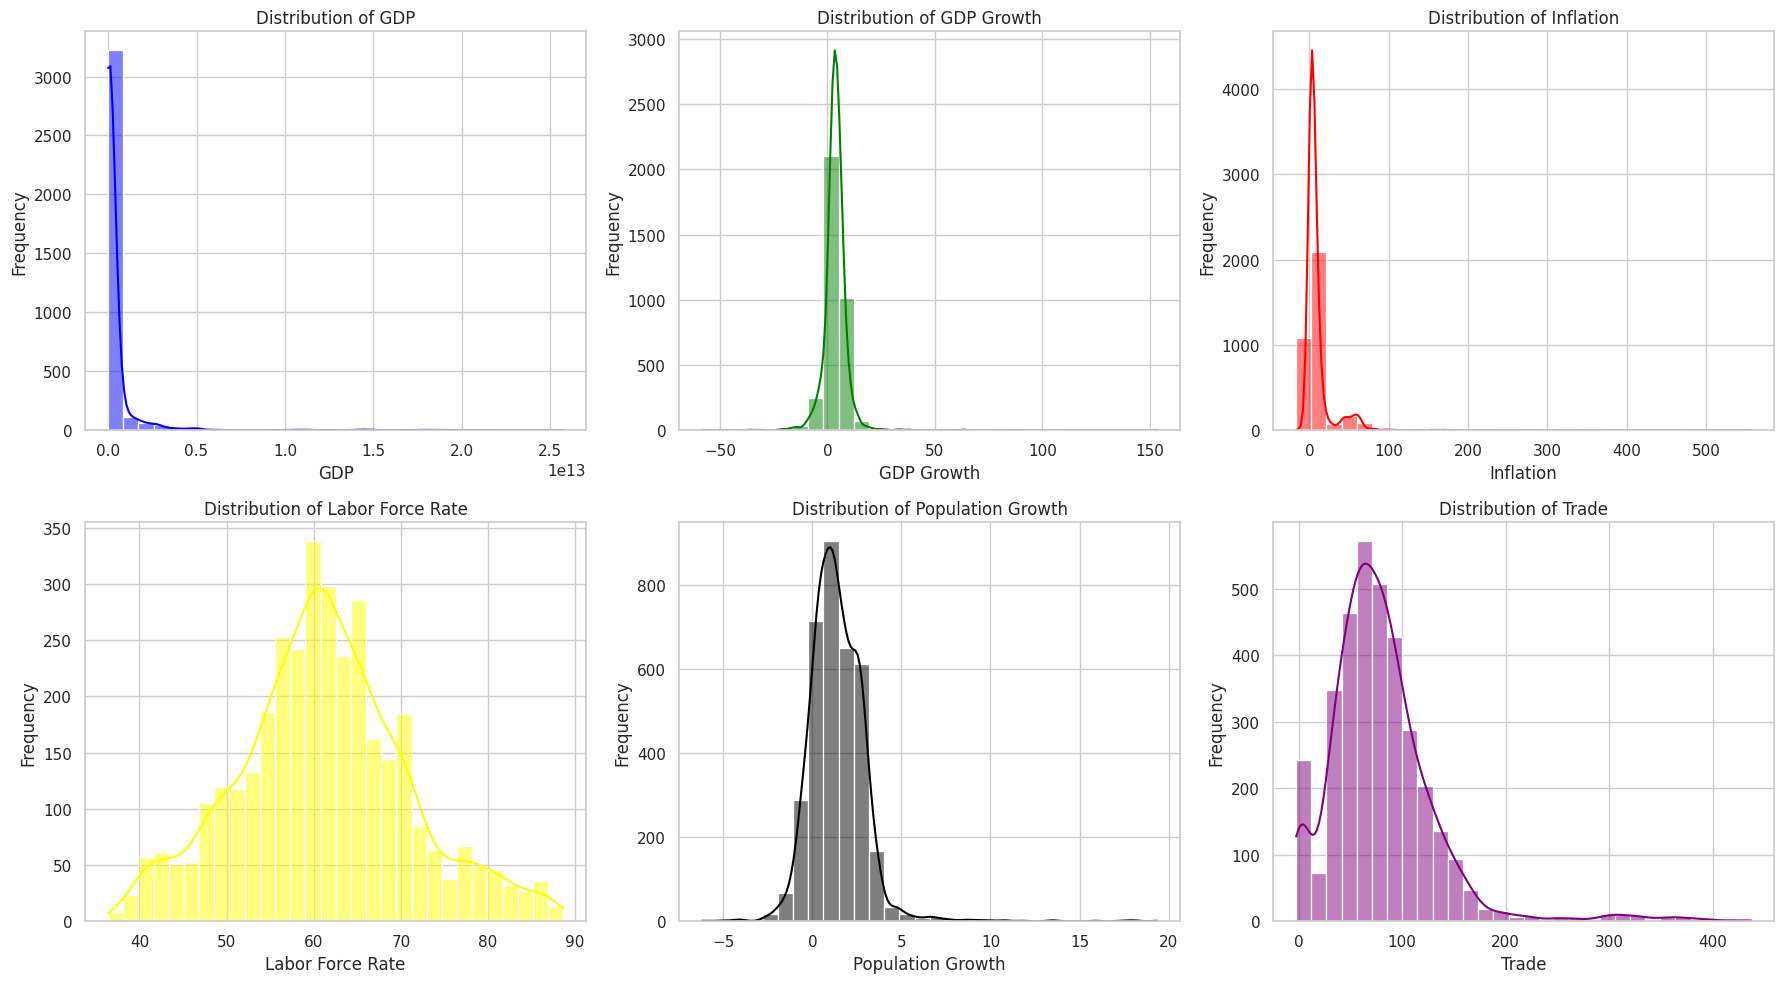

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the required columns for prediction and analysis
df = filtered_main_df[['Country Name', 'Continent', 'Year',
         'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
         'GDP (current US$)', 'GDP growth (annual %)',
         'Inflation, consumer prices (annual %)',
         'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
         'Population growth (annual %)', 'Trade (% of GDP)']]

# Rename columns for better readability
df_renamed = df.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'
})

# **Feature Distribution (Histograms) for Input Features**
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# List of input features and their respective colors
input_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']
colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']

# Plot histograms with different colors
for i, (feature, color) in enumerate(zip(input_features, colors)):
    sns.histplot(df_renamed[feature], ax=axes[i//3, i%3], kde=True, bins=30, color=color)
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


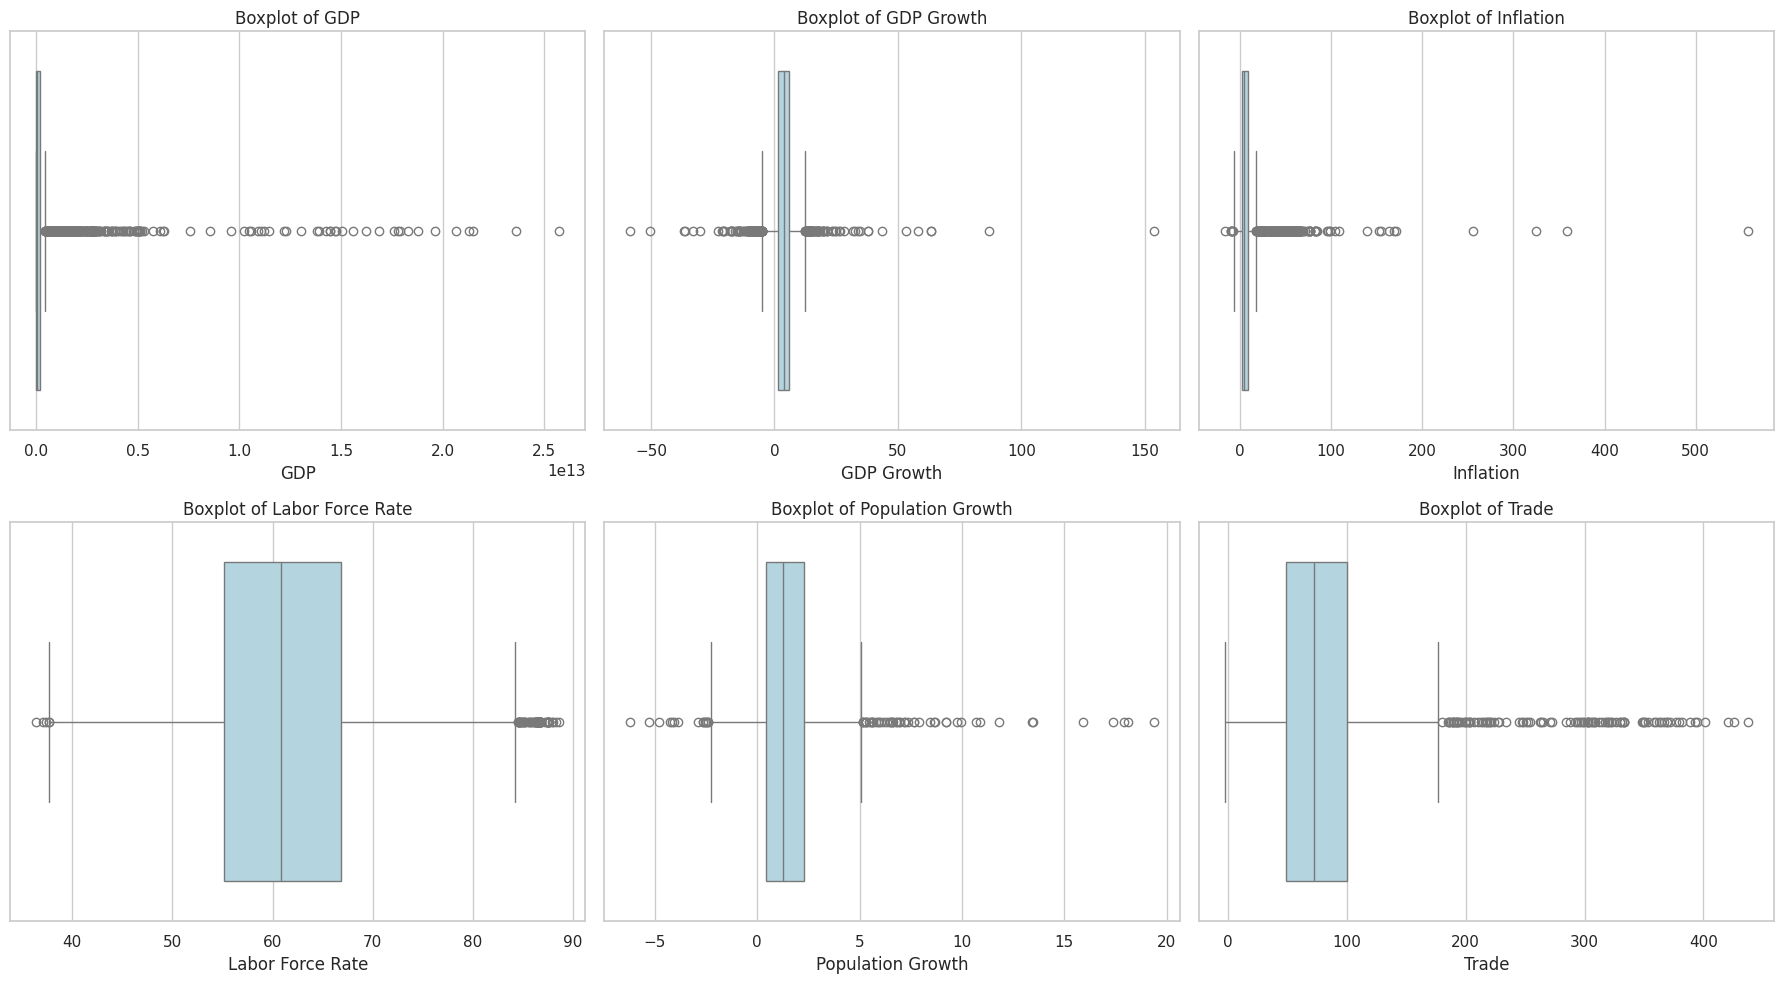

In [ ]:
# Check for outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(input_features):
    sns.boxplot(x=df_renamed[feature], ax=axes[i//3, i%3], color='lightblue')
    axes[i//3, i%3].set_title(f'Boxplot of {feature}')
    axes[i//3, i%3].set_xlabel(feature)

plt.tight_layout()
plt.show()


<ipython-input-20-98123fd7c424>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Employment Rate', data=df_renamed, palette="Set2")


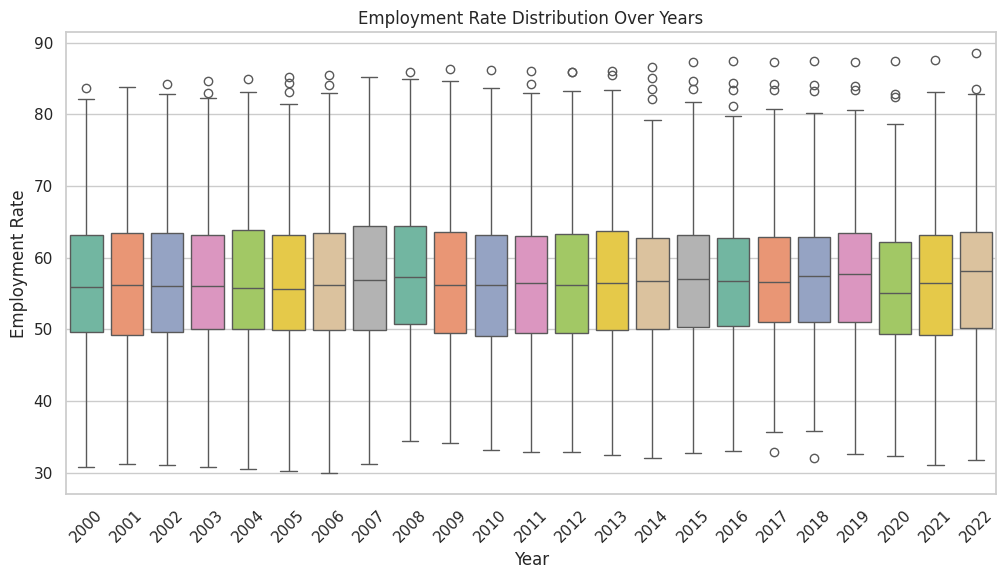

In [ ]:
# Boxplot for employment rate over years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Employment Rate', data=df_renamed, palette="Set2")
plt.title('Employment Rate Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()


<ipython-input-21-f3e88191cd6a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
<ipython-input-21-f3e88191cd6a>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
<ipython-input-21-f3e88191cd6a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
<ipython-input-21-f3e88191cd6a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
<ipython-input-21-f3e88191cd6a>:22: UserWarni

<Figure size 2000x1200 with 0 Axes>

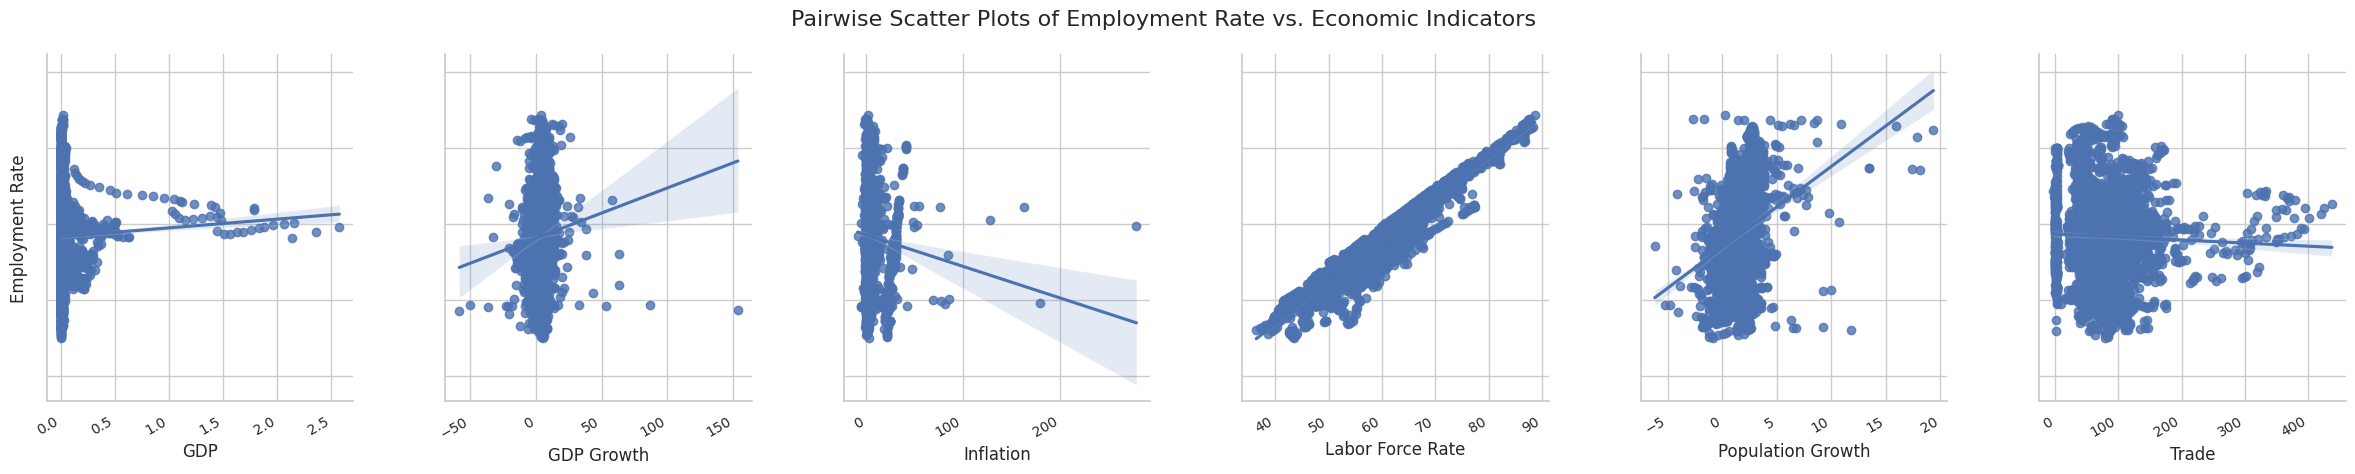

In [ ]:
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting with renamed columns
sns.set(style="whitegrid")
plt.figure(figsize=(20, 12))

# Pairwise scatter plots with trend lines
g = sns.pairplot(
    df_renamed,
    x_vars=['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade'],
    y_vars=['Employment Rate'],
    kind="reg",
    height=4.5,
    aspect=0.9
)

# Rotate x-axis labels and adjust y-axis label positions
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Adjust subplot parameters for better spacing
g.fig.subplots_adjust(top=0.92, bottom=0.15, hspace=0.4, wspace=0.3)
g.fig.suptitle("Pairwise Scatter Plots of Employment Rate vs. Economic Indicators", y=1.02, fontsize=16)

plt.show()


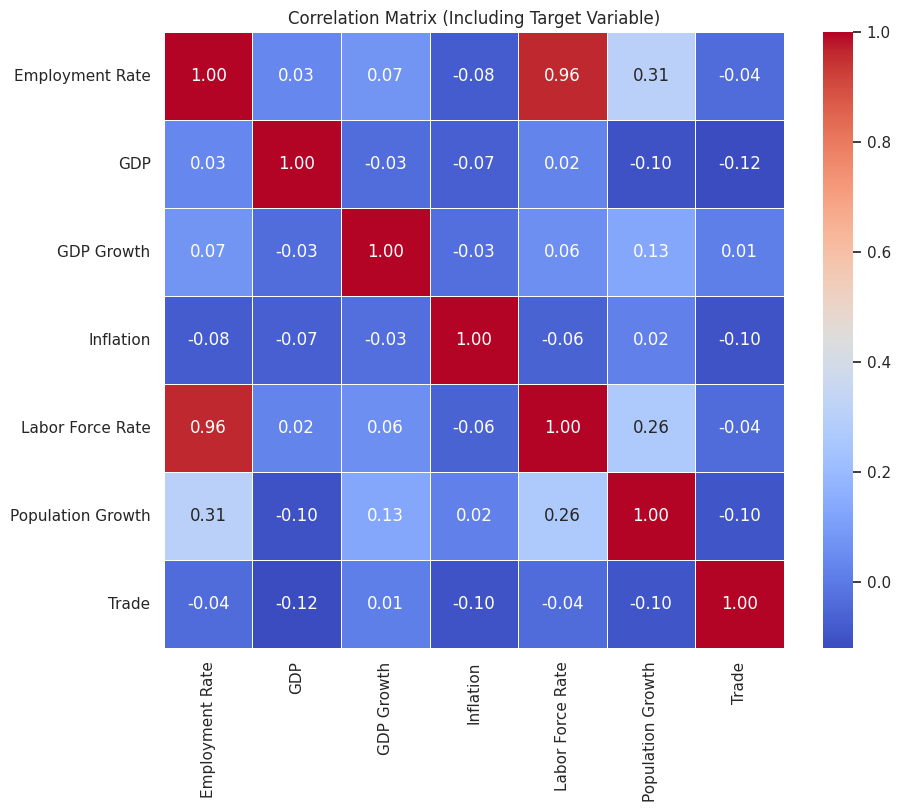

In [ ]:
# Calculate correlation matrix including the target variable
correlation_matrix = df_renamed[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Target Variable)')
plt.show()


In [ ]:
# Set up the heatmap for each continent
plt.figure(figsize=(20, 10))

# Loop over each continent to create individual heatmaps
for i, continent in enumerate(df_renamed['Continent'].unique(), 1):
    plt.subplot(2, 3, i)
    subset = df_renamed[df_renamed['Continent'] == continent]
    corr = subset[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation',
                   'Labor Force Rate', 'Population Growth', 'Trade']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=False)
    plt.title(f'Correlation Heatmap for {continent}')

plt.suptitle("Correlation of Employment Rate and Economic Indicators by Continent")
plt.tight_layout()
plt.show()


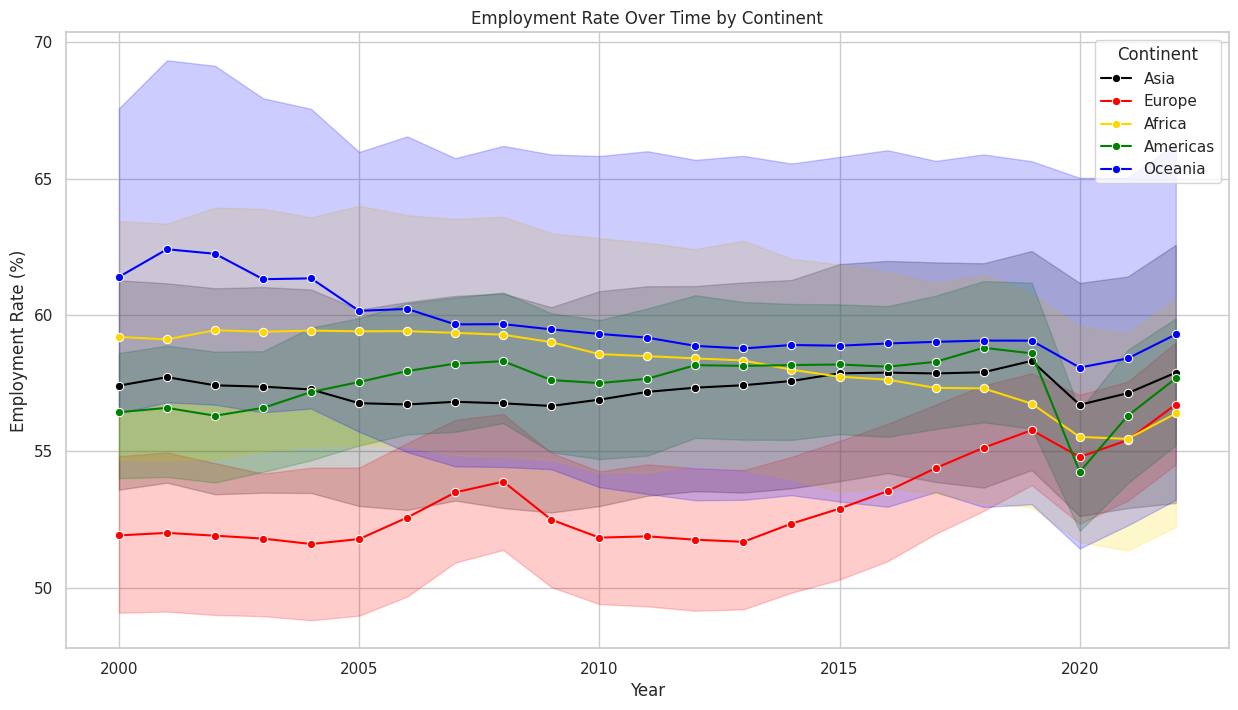

In [ ]:
# Group by Continent and Year, and calculate the mean of selected features
continent_time_series = df_renamed.groupby(['Continent', 'Year']).agg({
    'Employment Rate': 'mean',
    'GDP': 'mean',
    'Inflation': 'mean',
    'Labor Force Rate': 'mean',
    'Population Growth': 'mean',
    'Trade': 'mean'
}).reset_index()

# Plot time series for each continent
continents = continent_time_series['Continent'].unique()


# Plot using seaborn's lineplot with hue to distinguish continents
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()



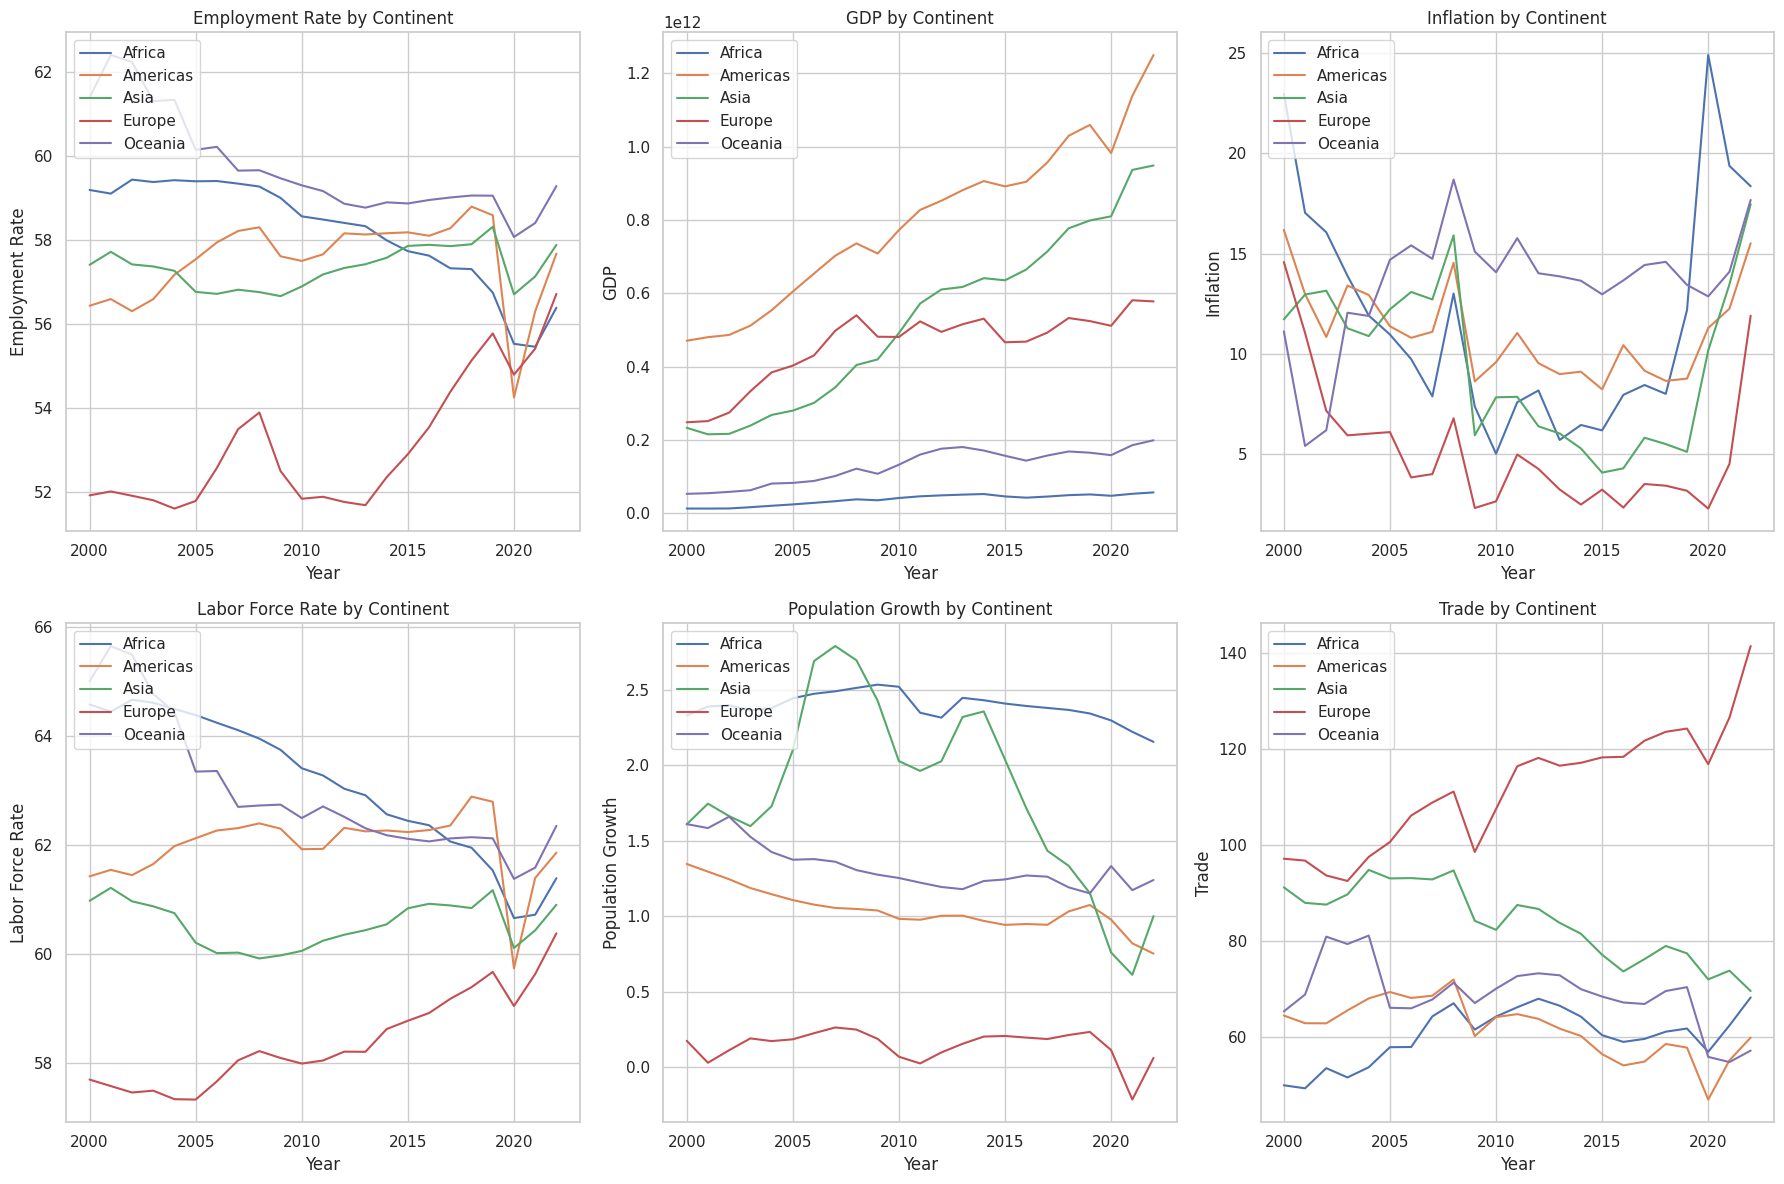

In [ ]:
# Create subplots for different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Features to plot
features = ['Employment Rate', 'GDP', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Loop through features and plot for each continent
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]

    for continent in continents:
        continent_data = continent_time_series[continent_time_series['Continent'] == continent]
        ax.plot(continent_data['Year'], continent_data[feature], label=f'{continent}')

    ax.set_title(f'{feature} by Continent')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
df_renamed[numeric_features] = scaler.fit_transform(df_renamed[numeric_features])

# Check the scaled values
print(df_renamed.head())


  Country Name Continent  Year  Employment Rate       GDP  GDP Growth  \
5  Afghanistan      Asia  2005           43.311 -0.236663    1.230864   
6  Afghanistan      Asia  2006           43.259 -0.236202    0.272020   
7  Afghanistan      Asia  2007           43.216 -0.234537    1.654843   
8  Afghanistan      Asia  2008           43.178 -0.234321    0.038131   
9  Afghanistan      Asia  2009           43.153 -0.232937    2.889944   

   Inflation  Labor Force Rate  Population Growth     Trade  
5   0.151142         -1.442052           1.381362 -1.441126  
6  -0.135433         -1.447786           1.736699 -1.430416  
7  -0.043368         -1.452700           0.256165 -1.475040  
8   0.817964         -1.456693           0.388122 -1.471062  
9  -0.795620         -1.459663           1.371759 -1.441415  


In [ ]:
# Split data into training and testing based on the year
train_df = df_renamed[df_renamed['Year'] <= 2020]
test_df = df_renamed[df_renamed['Year'] > 2020]

# Separate the features (X) and target variable (y)
X_train = train_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_df['Employment Rate']

X_test = test_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_test = test_df['Employment Rate']

# Check the shape of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3214, 6)
Testing data shape: (301, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the transformation
print("Scaled Training Data:\n", X_train_scaled[:5])
print("Scaled Testing Data:\n", X_test_scaled[:5])


Scaled Training Data:
 [[-0.24067767  1.39292029  0.18211442 -1.44326444  1.34469894 -1.45191028]
 [-0.24018498  0.33108941 -0.12007395 -1.44899313  1.69664141 -1.44108637]
 [-0.2384052   1.86243813 -0.02299276 -1.45390344  0.23025166 -1.48618486]
 [-0.2381735   0.07207946  0.88526601 -1.45789307  0.3609482  -1.48216532]
 [-0.23669457  3.23019772 -0.81622917 -1.46085971  1.33518772 -1.4522028 ]]
Scaled Testing Data:
 [[-0.23550831 -4.38763092  1.64432917 -2.03618424  0.89152994 -0.53253583]
 [-0.23535723 -1.76598314  1.45984167 -2.4047643   0.69351469 -0.11981848]
 [-0.23315928  0.97320345 -0.36294024 -0.24729732 -1.46963203 -0.05961279]
 [-0.23252727  0.24049835 -0.12311515 -0.08474564 -1.65015728  0.11589497]
 [-0.12523968  0.04947989 -0.09746917 -2.17735562  0.14557816 -0.61212068]]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model's performance
mae_LR = mean_absolute_error(y_test, y_pred)
mse_LR = mean_squared_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:\nMAE(LR): {mae_LR}\nMSE(LR): {mse_LR}\nR^2(LR): {r2_LR}")


ValueError: Found input variables with inconsistent numbers of samples: [352, 301]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data into 3D array for LSTM: (samples, timesteps, features)
def reshape_for_lstm(X):
    return X.reshape((X.shape[0], 1, X.shape[1]))

# Scale the features for LSTM (scaling between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = reshape_for_lstm(X_train_scaled)
X_test_lstm = reshape_for_lstm(X_test_scaled)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Predict with the model
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model Performance:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"R^2: {r2_lstm}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3340.2561
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3109.5623
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2588.8110
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1991.0261
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1487.0669
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1064.1765
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 776.1251
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 555.6323
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 408.3576
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 306.3524
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 232.1188
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 172.9811
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 143.7405
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 119.8733
Epoch 15/20
101/101 ━━━━━━━━━━━━━━

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

xg_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")


XGBoost Model Performance:
MAE: 6.694024180364767
MSE: 76.1079100227167
R^2: 0.3454287272048093


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target for Random Forest model
features = df_renamed[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
target = df_renamed['Employment Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Now filter the data for 2021 and 2022
actual_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Extract features for the prediction
features_for_prediction = actual_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Apply scaling to the features (same scaler as before, assuming you have `scaler` defined)
scaled_features = scaler.transform(features_for_prediction)

# Predict using the Random Forest model
predictions_2021_2022 = rf_model.predict(scaled_features)

# Add predictions to the actual data for comparison
actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(actual_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
<ipython-input-33-e4400ddd0587>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters found
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Predict on the test set
predictions = best_rf_model.predict(X_test)

# Evaluate the model performance
mae_hyper = mean_absolute_error(y_test, predictions)
mse_hyper = mean_squared_error(y_test, predictions)
r2_hyper = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 1.7020330631229228
MSE: 5.8396057471729135
R^2: 0.9497760723503226


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model on the data from 2000 to 2020
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Evaluate model performance (for 2021 and 2022 only)
mae_rf = mean_absolute_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
mse_rf = mean_squared_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
r2_rf = r2_score(test_data_2021_2022['Employment Rate'], predictions_2021_2022)

print(f"Model Performance for 2021-2022:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Save the trained model to a file
joblib.dump(rf_model, 'best_rf_model.pkl')
print("Model saved as 'best_rf_model.pkl'")


<ipython-input-35-04185b1d8423>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022


Model Performance for 2021-2022:
MAE: 1.7020330631229228
MSE: 5.8396057471729135
R^2: 0.9497760723503226
Model saved as 'best_rf_model.pkl'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Accuracy calculation: Accuracy (%) = R² * 100
accuracy_LR = round(r2_LR * 100, 1)
accuracy_lstm = round(r2_lstm * 100, 1)
accuracy_xgb = round(r2_xgb * 100, 1)
accuracy_rf = round(r2_rf * 100, 1)
accuracy_hyper = round(r2_hyper * 100, 1)

# Consolidate metrics for all models
model_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM', 'XGBoost', 'Random Forest (Default)', 'Random Forest (Tuned)'],
    'MAE': [mae_LR, mae_lstm, mae_xgb, mae_rf, mae_hyper],
    'MSE': [mse_LR, mse_lstm, mse_xgb, mse_rf, mse_hyper],
    'R2': [r2_LR, r2_lstm, r2_xgb, r2_rf, r2_hyper],
    'Accuracy (%)': [accuracy_LR, accuracy_lstm, accuracy_xgb, accuracy_rf, accuracy_hyper]
})

# Print the metrics summary
print("Model Performance Summary:")
print(model_metrics)


# Plot Accuracy (%) Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['Accuracy (%)'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Model Accuracy (%) Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(10, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MAE Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['MAE'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Model MAE Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot MSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['MSE'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Model MSE Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot R² Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['R2'], color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Model R² Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² (Accuracy)', fontsize=14)
plt.ylim(0.1, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



NameError: name 'r2_LR' is not defined

In [ ]:
from tabulate import tabulate

# Extract relevant columns for the comparison table
comparison_data = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Convert the DataFrame to a tabular format using tabulate
table = tabulate(comparison_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


+--------------------------+------+-----------------+---------------------------+
|       Country Name       | Year | Employment Rate | Predicted Employment Rate |
+--------------------------+------+-----------------+---------------------------+
|       Afghanistan        | 2021 |     36.263      |     37.40130199999992     |
|       Afghanistan        | 2022 |     32.333      |     32.8389219999999      |
|         Albania          | 2021 |     51.336      |     50.58980000000012     |
|         Albania          | 2022 |     53.304      |     54.52440999999999     |
|         Algeria          | 2021 |      34.39      |     34.35605800000001     |
|         Algeria          | 2022 |     36.593      |     37.19882799999998     |
|          Angola          | 2021 |     64.304      |     65.79060799999996     |
|          Angola          | 2022 |     64.447      |     69.18221000000013     |
|        Argentina         | 2021 |     55.085      |     55.02873799999984     |
|        Argenti

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

# Features to forecast
features_to_forecast = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'Population growth (annual %)',
    'Trade (% of GDP)'
]

# Step 1: Initialize lists for storing results
results = []

# Step 2: Loop through each continent and feature
for continent in df['Continent'].unique():
    continent_data = df[df['Continent'] == continent]

    for feature in features_to_forecast:
        actual_values_all = []
        predicted_values_all = []

        for country in continent_data['Country Name'].unique():
            # Filter data for country and feature
            country_data = continent_data[continent_data['Country Name'] == country]
            feature_data = country_data[['Year', feature]].dropna()
            feature_data.set_index('Year', inplace=True)

            # Ensure enough data for ARIMA fitting
            if len(feature_data) > 3:
                train_data = feature_data[:-3]
                test_data = feature_data[-3:]

                # Fit ARIMA model
                model = ARIMA(train_data, order=(1, 1, 1))
                model_fit = model.fit()

                # Forecast for test period
                forecast = model_fit.forecast(steps=len(test_data))

                # Collect actual and predicted values
                actual_values_all.extend(test_data.values.flatten())
                predicted_values_all.extend(forecast.values)

        # Calculate MAPE for the continent and feature
        if len(actual_values_all) > 0 and len(predicted_values_all) > 0:
            mape = mean_absolute_percentage_error(actual_values_all, predicted_values_all)
            results.append([continent, feature, mape, actual_values_all, predicted_values_all])

# Step 3: Create a results DataFrame
results_df = pd.DataFrame(results, columns=['Continent', 'Feature', 'MAPE', 'Actual', 'Predicted'])

# Step 4: Prepare data for plotting
plot_data = []
for _, row in results_df.iterrows():
    for actual_value in row['Actual']:
        plot_data.append(['Actual', row['Feature'], actual_value])
    for predicted_value in row['Predicted']:
        plot_data.append(['Predicted', row['Feature'], predicted_value])

plot_df = pd.DataFrame(plot_data, columns=['Type', 'Feature', 'Value'])

# Step 5: Create subplots for each feature
unique_features = plot_df['Feature'].unique()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2x3 grid for 6 features
axes = axes.flatten()  # Flatten for easier iteration

for i, feature in enumerate(unique_features):
    feature_data = plot_df[plot_df['Feature'] == feature]
    sns.violinplot(
        data=feature_data,
        x='Type',
        y='Value',
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"Feature: {feature}", fontsize=10)
    axes[i].set_ylabel("Value", fontsize=8)
    axes[i].set_xlabel("Type", fontsize=8)

# Adjust layout
plt.tight_layout()
plt.suptitle("Violin Plot of Actual vs Predicted Values for Each Feature", fontsize=16, y=1.03)
plt.show()

# Step 6: Display MAPE results
print("MAPE Results by Continent and Feature:")
print(results_df[['Continent', 'Feature', 'MAPE']])


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Assuming your original dataset is already loaded into df
features_to_forecast = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'Population growth (annual %)',
    'Trade (% of GDP)'
]

# Step 1: Create an empty DataFrame to store the forecast results for all countries
forecast_all_countries = []

# Step 2: Iterate through each country in the dataset
for country in df['Country Name'].unique():
    # Filter data for the current country
    country_data = df[df['Country Name'] == country]

    # Step 3: Forecast each feature for the current country
    forecast_results_country = {'Country Name': country}

    for feature in features_to_forecast:
        # Extract the historical data for the feature
        feature_data = country_data[['Year', feature]].dropna()
        feature_data.set_index('Year', inplace=True)

        # ARIMA model (example with order=(1,1,1), you can adjust this based on your dataset)
        model = ARIMA(feature_data[feature], order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast the next 3 years (2023, 2024, 2025)
        forecast = model_fit.forecast(steps=3)

        # Add forecast values to the results
        forecast_results_country[feature] = forecast

    # Add forecast data for the country to the main list
    forecast_all_countries.append(forecast_results_country)

# Step 4: Combine all country forecasts into a single DataFrame
forecast_combined = pd.DataFrame(forecast_all_countries)

# Step 5: Reshape the data to match the number of forecasted years for each country
forecast_combined = pd.DataFrame({
    'Country Name': np.repeat(df['Country Name'].unique(), 3),  # Repeat countries 3 times for each forecast year
    'Year': [2023, 2024, 2025] * len(df['Country Name'].unique())  # Repeat the years 2023, 2024, 2025
})

# Step 6: Merge the forecasted features with the country names and years
for feature in features_to_forecast:
    forecast_combined[feature] = np.concatenate([forecast_results_country[feature] for forecast_results_country in forecast_all_countries])

# Step 7: Rename columns to match the transformed dataset (df_renamed)
forecast_combined.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade'
}, inplace=True)

# Step 8: Display the forecasted results
print(forecast_combined)


                 Country Name  Year           GDP  GDP Growth   Inflation  \
0                 Afghanistan  2023  1.400603e+10   -9.340156   34.535821   
1                 Afghanistan  2024  1.357850e+10   -8.744667   33.703660   
2                 Afghanistan  2025  1.321008e+10   -8.859057   33.480576   
3                     Albania  2023  1.955229e+10    3.818303    2.311447   
4                     Albania  2024  2.018429e+10    3.855457    2.556181   
5                     Albania  2025  2.081241e+10    3.854127    2.542611   
6                     Algeria  2023  2.288031e+11    2.189254    6.529110   
7                     Algeria  2024  2.275373e+11    2.009594    5.843673   
8                     Algeria  2025  2.280314e+11    1.986714    5.671980   
9                      Angola  2023  1.132799e+11    1.148024   22.043578   
10                     Angola  2024  1.119750e+11    1.102194   22.356072   
11                     Angola  2025  1.121667e+11    1.101087   22.497949   

In [ ]:
forecast_combined.head()

,Country Name,Year,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
0,Afghanistan,2023,1.400603e+10,-9.340156,34.535821,35.602417,2.946428,82.245914
1,Afghanistan,2024,1.357850e+10,-8.744667,33.703660,33.691837,3.055740,90.278384
2,Afghanistan,2025,1.321008e+10,-8.859057,33.480576,31.900344,3.084747,97.171281
3,Albania,2023,1.955229e+10,3.818303,2.311447,59.772884,-1.267068,80.164970
4,Albania,2024,2.018429e+10,3.855457,2.556181,59.350469,-1.294112,78.287202


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
forecast_combined[numeric_features] = scaler.fit_transform(forecast_combined[numeric_features])

# Check the scaled values
forecast_combined.head()


,Country Name,Year,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
0,Afghanistan,2023,-0.225284,-2.361592,0.875348,-2.621479,1.259473,-0.010733
1,Afghanistan,2024,-0.225440,-2.247992,0.839217,-2.816032,1.329929,0.121319
2,Afghanistan,2025,-0.225574,-2.269814,0.829531,-2.998459,1.348626,0.234638
3,Albania,2023,-0.223259,0.148615,-0.523799,-0.160212,-1.456310,-0.044944
4,Albania,2024,-0.223028,0.155703,-0.513173,-0.203226,-1.473742,-0.075814


In [ ]:
from joblib import load
import numpy as np
import pandas as pd

# Load the trained Random Forest model from Part B
model = load('part_b_best_rf_model.pkl')
print("Loaded model: part_b_best_rf_model.pkl")



# Step 2: Inject Historical Variability into Forecasted Features
# Add noise based on the standard deviation of each feature in the original dataset
for col in ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']:
    forecast_combined[col] += np.random.normal(0, df_renamed[col].std() * 0.1, len(forecast_combined))

# Step 3: Ensure Consistent Scaling
# Select features for prediction
trained_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']



# Step 4: Predict Employment Rates for 2023–2025
forecast_combined['Predicted Employment Rate'] = model.predict(forecast_combined[trained_features])

# Display the predicted employment rates
print("Predicted Employment Rates (2023–2025):")
print(forecast_combined[['Country Name', 'Year', 'Predicted Employment Rate']])

# Validate the predictions for 2021–2022
# Step 4a: Compare predictions using actual and forecasted features for 2021–2022
validation_data = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]
validation_features = validation_data[trained_features]

# Scale the actual features for 2021–2022
validation_features_scaled = scaler.transform(validation_features)

# Predict using the model
validation_data['Predicted Employment Rate'] = model.predict(validation_features_scaled)

# Display the validation results
print("Validation Results (2021–2022):")
print(validation_data[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])

# Step 4b: Save Predictions for 2023–2025
# Save the forecasted predictions to a CSV file
forecast_combined[['Country Name', 'Year', 'Predicted Employment Rate']].to_csv('predicted_employment_rate_2023_2025.csv', index=False)

# Display the predictions for 2023–2025
print("Predicted Employment Rates (2023–2025):")
print(forecast_combined[['Country Name', 'Year', 'Predicted Employment Rate']])

print("Predictions saved to 'predicted_employment_rate_2023_2025.csv'")


Loaded model: part_b_best_rf_model.pkl
Predicted Employment Rates (2023–2025):
                 Country Name  Year  Predicted Employment Rate
0                 Afghanistan  2023                  34.062382
1                 Afghanistan  2024                  34.040852
2                 Afghanistan  2025                  32.753206
3                     Albania  2023                  49.654146
4                     Albania  2024                  49.927216
5                     Albania  2025                  51.231274
6                     Algeria  2023                  38.432132
7                     Algeria  2024                  33.882014
8                     Algeria  2025                  38.428824
9                      Angola  2023                  69.397540
10                     Angola  2024                  65.868352
11                     Angola  2025                  69.535230
12                  Argentina  2023                  54.048110
13                  Argentina  2024    

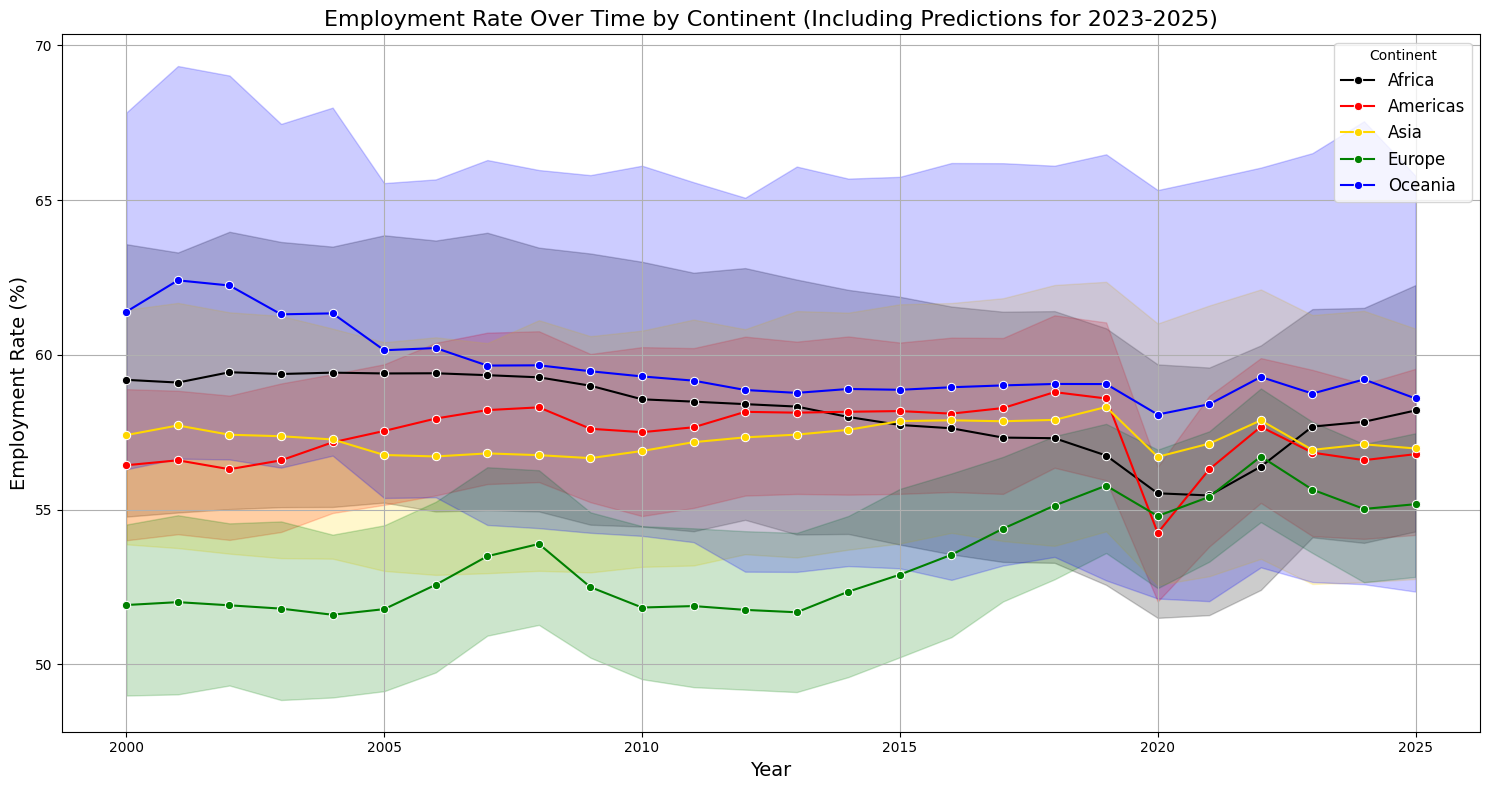

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Remove existing 'Continent' column from forecast_combined if it exists
if 'Continent' in forecast_combined.columns:
    forecast_combined.drop(columns=['Continent'], inplace=True)

# Step 2: Add 'Continent' column to forecast_combined by merging with historical data
forecast_combined = forecast_combined.merge(
    df_renamed[['Country Name', 'Continent']].drop_duplicates(),
    on='Country Name',
    how='left'
)

# Step 3: Combine historical and forecasted data
combined_data = pd.concat([
    df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']],
    forecast_combined[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]
])

# Step 4: Rename 'Predicted Employment Rate' to 'Employment Rate' for consistency
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])

# Drop the 'Predicted Employment Rate' column as it's now merged
combined_data.drop(columns=['Predicted Employment Rate'], inplace=True)

# Step 5: Sort the data for better visual continuity
combined_data.sort_values(by=['Continent', 'Country Name', 'Year'], inplace=True)

# Step 6: Plot time series for each continent, including historical and predicted data
plt.figure(figsize=(15, 8))

sns.lineplot(
    data=combined_data,
    x='Year',
    y='Employment Rate',
    hue='Continent',
    marker='o',
    palette=['black', 'red', 'gold', 'green', 'blue']
)

# Add plot details
plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Employment Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print(forecast_combined[['Year', 'GDP', 'GDP Growth', 'Inflation','Labor Force Rate', 'Population Growth', 'Trade']].describe())
print(df_renamed[['Year', 'GDP', 'GDP Growth', 'Inflation','Labor Force Rate', 'Population Growth', 'Trade']].describe()  )


              Year           GDP    GDP Growth     Inflation  \
count   462.000000  4.620000e+02  4.620000e+02  4.620000e+02   
mean   2024.000000 -1.537971e-17  8.458842e-17  7.689856e-18   
std       0.817382  1.001084e+00  1.001084e+00  1.001084e+00   
min    2023.000000 -2.302108e-01 -6.512507e+00 -5.927061e-01   
25%    2023.000000 -2.238160e-01 -2.510737e-01 -4.543920e-01   
50%    2024.000000 -2.085611e-01  8.170047e-03 -3.286097e-01   
75%    2025.000000 -1.216202e-01  2.362016e-01 -9.294939e-02   
max    2025.000000  9.931085e+00  1.103748e+01  6.876982e+00   

       Labor Force Rate  Population Growth         Trade  
count      4.620000e+02         462.000000  4.620000e+02  
mean       1.480297e-15           0.000000 -9.996813e-17  
std        1.001084e+00           1.001084  1.001084e+00  
min       -2.998459e+00          -6.749129 -3.154238e+00  
25%       -6.318889e-01          -0.377158 -5.800125e-01  
50%        4.218698e-02           0.045143 -1.302944e-01  
75%       

In [ ]:
##### CUT FROM LATEST FILE
from sklearn.ensemble import RandomForestRegressor

# Define features and target for Random Forest model
features = df_renamed[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
target = df_renamed['Employment Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Now filter the data for 2021 and 2022
actual_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Extract features for the prediction
features_for_prediction = actual_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Apply scaling to the features (same scaler as before, assuming you have `scaler` defined)
scaled_features = scaler.transform(features_for_prediction)

# Predict using the Random Forest model
predictions_2021_2022 = rf_model.predict(scaled_features)

# Add predictions to the actual data for comparison
actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(actual_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])









#another part model RFR

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")
